<a href="https://colab.research.google.com/github/Rohanpeerla/Module-6-Lab-2/blob/master/Module_6_Lab_2_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.


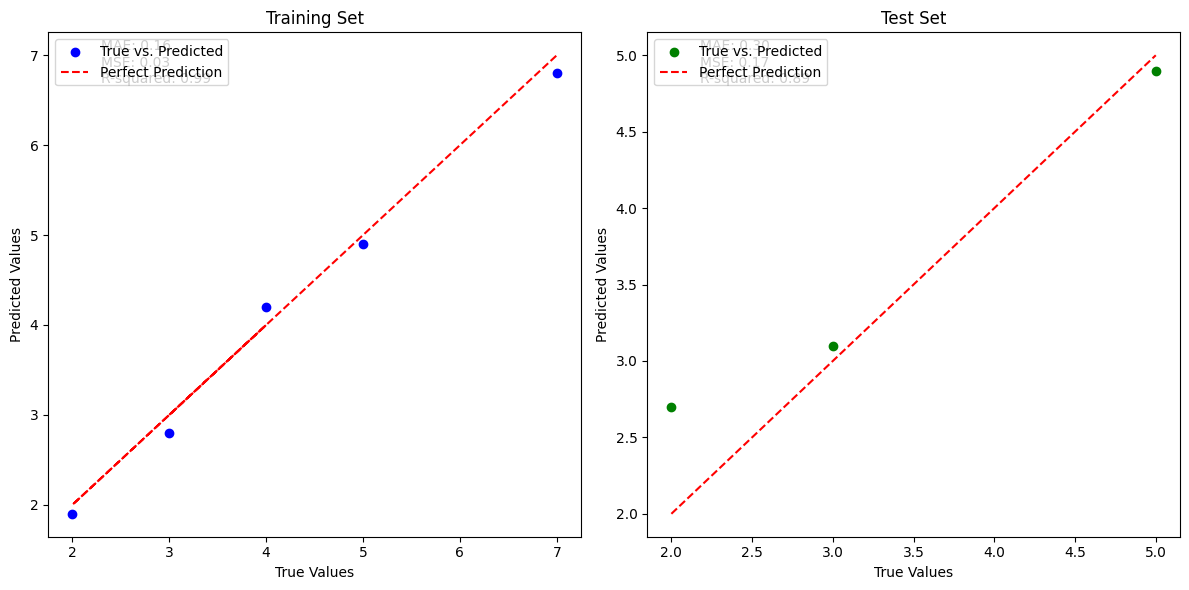

In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
y_train_true = np.array([3, 4, 2, 5, 7])
y_test_true = np.array([2, 3, 5])
y_train_pred = np.array([2.8, 4.2, 1.9, 4.9, 6.8])
y_test_pred = np.array([2.7, 3.1, 4.9])
train_mae = mean_absolute_error(y_train_true, y_train_pred)
train_mse = mean_squared_error(y_train_true, y_train_pred)
train_r2 = r2_score(y_train_true, y_train_pred)
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_mse = mean_squared_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_true, y_train_pred, color='blue', label='True vs. Predicted')
plt.plot(y_train_true, y_train_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Training Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.text(0.1, 0.9, f"MAE: {train_mae:.2f}\nMSE: {train_mse:.2f}\nR-squared: {train_r2:.2f}", transform=plt.gca().transAxes)
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y_test_true, y_test_pred, color='green', label='True vs. Predicted')
plt.plot(y_test_true, y_test_true, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Test Set')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.text(0.1, 0.9, f"MAE: {test_mae:.2f}\nMSE: {test_mse:.2f}\nR-squared: {test_r2:.2f}", transform=plt.gca().transAxes)
plt.legend()
plt.tight_layout()
plt.show()


2.Explore other loss functions and try to understand when and why they are used.

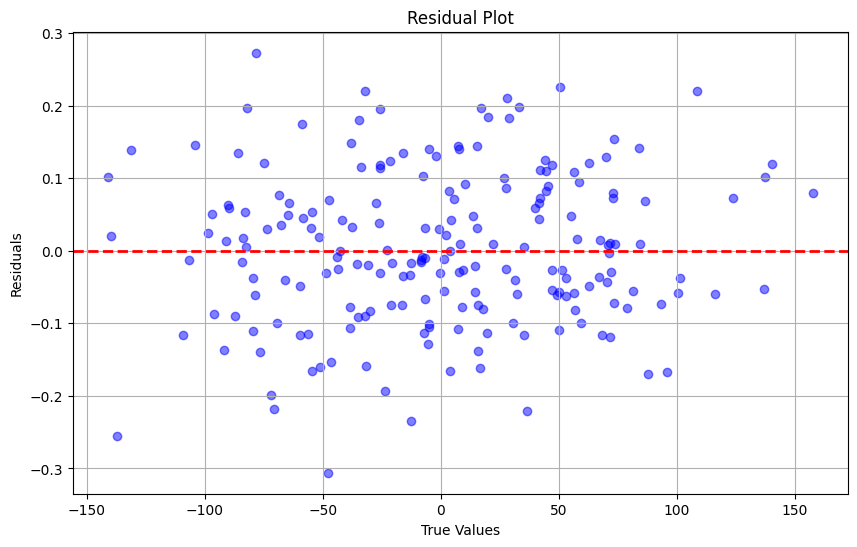

Mean Squared Error (MSE): 0.011090609683464713
Mean Absolute Error (MAE): 0.08535103887972018


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


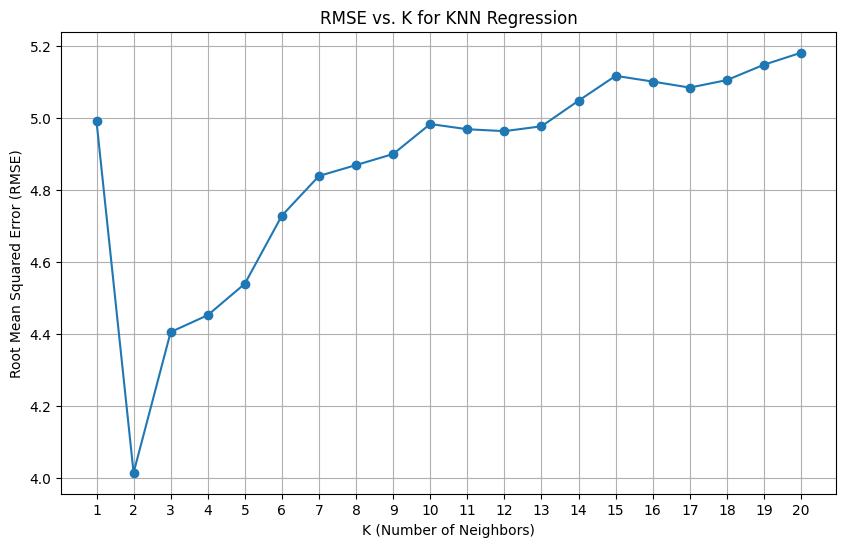

Optimal value of K for KNN regression: 2


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
boston = fetch_openml(data_id=531)
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def knn_regression(k, X_train, y_train, X_test, y_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    return rmse
rmse_values = []
k_values = range(1, 21)
for k in k_values:
    rmse = knn_regression(k, X_train_scaled, y_train, X_test_scaled, y_test)
    rmse_values.append(rmse)
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-')
plt.title('RMSE vs. K for KNN Regression')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
optimal_k = k_values[np.argmin(rmse_values)]
print("Optimal value of K for KNN regression:", optimal_k)